In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import h3
import geopandas as gpd
import geojson

In [2]:
import sys
print(sys.path)

['C:\\Users\\marlxn\\Desktop\\uni\\master\\AAA\\AAA-AIbertus-Magnus\\tasks', 'C:\\Users\\marlxn\\miniconda3\\python312.zip', 'C:\\Users\\marlxn\\miniconda3\\DLLs', 'C:\\Users\\marlxn\\miniconda3\\Lib', 'C:\\Users\\marlxn\\miniconda3', '', 'C:\\Users\\marlxn\\miniconda3\\Lib\\site-packages', 'C:\\Users\\marlxn\\miniconda3\\Lib\\site-packages\\win32', 'C:\\Users\\marlxn\\miniconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\marlxn\\miniconda3\\Lib\\site-packages\\Pythonwin']


In [3]:
df = pd.read_csv("../data/analytics_trip_data.csv")

In [4]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'])

In [46]:
df["trip_middle_timestamp"] = df["trip_start_timestamp"] + ((df['trip_end_timestamp']-df['trip_start_timestamp'])/2)

In [5]:
df.rename(columns={"h3_res_4": "h3_res_4_pickup", "h3_res_6": "h3_res_6_pickup", "h3_res_8":"h3_res_8_pickup"},inplace=True)

In [53]:
pd.set_option('display.max_columns', None)
df.head(5)

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_location,dropoff_centroid_location,h3_res_4_pickup,h3_res_6_pickup,h3_res_8_pickup,h3_res_4_dropoff,h3_res_6_dropoff,h3_res_8_dropoff,date,temperature,precipitation,hour,weekday,trip_middle_timestamp
0,0a0a2ca50df85134ce34f0c2c7bda6e78ca2a52c,bbe793119144e0bd97a4268af2a28ed0f3dad49545592c...,2018-01-01 00:15:00,2018-01-01 00:15:00,180.0,0.00,1.703108e+10,1.703132e+10,8.0,32.0,4.00,2.0,0.0,1.0,7.00,Credit Card,Blue Ribbon Taxi Association Inc.,POINT (-87.6262149064 41.8925077809),POINT (-87.6209929134 41.8849871918),862664c1fffffff,842664dffffffff,882664c1e1fffff,842664dffffffff,862664c1fffffff,882664c1e3fffff,2018-01-01 01:53:00,-18.333333,0.0,0,Monday,2018-01-01 00:15:00
1,d5d00fe6f098623a12325194a3c9b9c8259addac,12052a7776cbfcf53d9daa2805ef852de2dbfb28bc38a6...,2018-01-01 00:15:00,2018-01-01 00:15:00,217.0,0.61,1.703184e+10,1.703132e+10,32.0,32.0,4.75,0.0,0.0,1.5,6.25,Cash,Taxi Affiliation Service Yellow,POINT (-87.6327464887 41.8809944707),POINT (-87.6209929134 41.8849871918),862664c1fffffff,842664dffffffff,882664c1a9fffff,842664dffffffff,862664c1fffffff,882664c1e3fffff,2018-01-01 01:53:00,-18.333333,0.0,0,Monday,2018-01-01 00:15:00
2,4d1b86ec3bad2e8a8b0273223d79cef7600b2821,bbdec1f9949f4e13be32d6d0038763a29f09ef18534115...,2018-01-01 00:15:00,2018-01-01 00:30:00,840.0,4.20,NaN,NaN,8.0,22.0,14.50,0.0,0.0,0.0,14.50,Cash,Globe Taxi,POINT (-87.6333080367 41.899602111),POINT (-87.69915534320002 41.9227606205),862664c1fffffff,842664dffffffff,882664c1edfffff,842664dffffffff,862664ca7ffffff,882664ca11fffff,2018-01-01 01:53:00,-18.333333,0.0,0,Monday,2018-01-01 00:22:30
3,59c63295676feae18f036452c2df04af9652f956,bda6300ce64bfe977c79eb92ade7d37b6d4e05fed81151...,2018-01-01 00:15:00,2018-01-01 00:30:00,294.0,0.85,NaN,NaN,24.0,24.0,5.00,0.0,0.0,2.0,7.00,Cash,Chicago Carriage Cab Corp,POINT (-87.6763559892 41.90120699410001),POINT (-87.6763559892 41.90120699410001),862664cafffffff,842664dffffffff,882664cac3fffff,842664dffffffff,862664cafffffff,882664cac3fffff,2018-01-01 01:53:00,-18.333333,0.0,0,Monday,2018-01-01 00:22:30
4,12c6e02f7d25c503736dae233ce2281a815dc67a,28d27337bea07d811235348e9b25af937d110ac08ca576...,2018-01-01 00:15:00,2018-01-01 00:30:00,486.0,4.55,NaN,NaN,28.0,35.0,13.50,0.0,0.0,0.0,13.50,Cash,Chicago Carriage Cab Corp,POINT (-87.6635175498 41.874005383),POINT (-87.6186777673 41.8351179863),862664cafffffff,842664dffffffff,882664ca91fffff,842664dffffffff,862664cf7ffffff,882664cf53fffff,2018-01-01 01:53:00,-18.333333,0.0,0,Monday,2018-01-01 00:22:30


In [7]:
#Pass dataframe as pd object and h3geocol,datacol,legend_name as strings
def create_choropleth(dataframe,h3geocol,datacol,legend_name):
    grouped_data = dataframe.groupby(dataframe[h3geocol])[datacol].mean().reset_index()
    m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
    
    geojson_data = {
        'type': 'FeatureCollection',
        'features': []
    }
    
    for index, row in grouped_data.iterrows():
        geometry = {'type': 'Polygon', 'coordinates': [h3.h3_to_geo_boundary(row[h3geocol], geo_json=True)]}
        feature = {'type': 'Feature', 'geometry': geometry, 'properties': {f'{h3geocol}': row[h3geocol],f'{datacol}': row[datacol]}}
        geojson_data['features'].append(feature)
        
    cp = folium.Choropleth(
        geo_data=geojson_data,
        data=grouped_data,
        columns=[h3geocol, datacol],
        key_on=f'feature.properties.{h3geocol}',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend_name
    ).add_to(m)

    folium.GeoJsonTooltip([h3geocol,datacol]).add_to(cp.geojson)
    
    return m

In [8]:
create_choropleth(df,"h3_res_8_dropoff","trip_seconds","Average Total trip seconds")

In [9]:
create_choropleth(df,"h3_res_8_pickup","trip_total","Average total trip price")

In [10]:
#TODO: add price per mile/km

In [229]:
census_tract_geojson =  gpd.read_file("../data/Chicago_boundaries.geojson")

In [230]:
census_tract_geojson

,statefp10,name10,commarea_n,namelsad10,commarea,geoid10,notes,tractce10,countyfp10,geometry
0,17,8424,44,Census Tract 8424,44,17031842400,,842400,031,"MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ..."
1,17,8403,59,Census Tract 8403,59,17031840300,,840300,031,"MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ..."
2,17,8411,34,Census Tract 8411,34,17031841100,,841100,031,"MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ..."
3,17,8412,31,Census Tract 8412,31,17031841200,,841200,031,"MULTIPOLYGON (((-87.68813 41.85569, -87.68816 ..."
4,17,8390,32,Census Tract 8390,32,17031839000,,839000,031,"MULTIPOLYGON (((-87.63312 41.87449, -87.63306 ..."
...,...,...,...,...,...,...,...,...,...,...
796,17,704,7,Census Tract 704,7,17031070400,,070400,031,"MULTIPOLYGON (((-87.65746 41.93258, -87.65722 ..."
797,17,705,7,Census Tract 705,7,17031070500,,070500,031,"MULTIPOLYGON (((-87.66349 41.93036, -87.66350 ..."
798,17,1303,13,Census Tract 1303,13,17031130300,,130300,031,"MULTIPOLYGON (((-87.71436 41.98300, -87.71472 ..."
799,17,2922,29,Census Tract 2922,29,17031292200,,292200,031,"MULTIPOLYGON (((-87.71317 41.85523, -87.71357 ..."


In [63]:
tempdf = df

In [65]:
hourly = tempdf.groupby(df["trip_middle_timestamp"].dt.hour)["trip_seconds"].mean().reset_index()
weekdaily = tempdf.groupby(df["trip_middle_timestamp"].dt.weekday)["trip_seconds"].mean().reset_index()

In [66]:
# Neue Spalten für Stunde und Wochentag hinzufügen
tempdf['hour'] = df['trip_middle_timestamp'].dt.hour
tempdf['weekday'] = df['trip_middle_timestamp'].dt.day_name()

# Pivot-Tabelle erstellen
pivot_table = tempdf.pivot_table(index='weekday', columns='hour', values='trip_seconds', aggfunc='mean')

# Wochentage in der richtigen Reihenfolge anordnen
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [67]:
tempdf[(tempdf["weekday"]=="Sunday") & (tempdf["hour"] == 16)]

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_location,dropoff_centroid_location,h3_res_4_pickup,h3_res_6_pickup,h3_res_8_pickup,h3_res_4_dropoff,h3_res_6_dropoff,h3_res_8_dropoff,date,temperature,precipitation,hour,weekday,trip_middle_timestamp
158203,d65b6c3bb68cb2fea3bd5604b0e4611301635c68,1eba7c19fc49260d67105f0fa98a4be0f4aa006f4d3959...,2018-01-07 15:45:00,2018-01-07 16:15:00,1202.0,5.50,NaN,NaN,38.0,67.0,17.25,0.00,0.0,0.0,17.25,Prcard,Taxi Affiliation Service Yellow,POINT (-87.6178596758 41.8129489392),POINT (-87.6665962653 41.7759288274),862664cc7ffffff,842664dffffffff,882664cc4dfffff,842664dffffffff,862664cd7ffffff,882664cd1bfffff,2018-01-07 15:53:00,-2.222222,0.0,16,Sunday,2018-01-07 16:00:00
158267,0fbe1942024dbf713f2bbc2de7bf0e31e6164f10,848a1ee7cd6c9d5c24658a35523ec72ae374eef3f562bc...,2018-01-07 15:45:00,2018-01-07 16:15:00,1424.0,2.57,1.703128e+10,1.703128e+10,28.0,28.0,14.00,4.65,0.0,1.0,20.15,Credit Card,Sun Taxi,POINT (-87.642648998 41.8792550844),POINT (-87.642648998 41.8792550844),862664c1fffffff,842664dffffffff,882664c1adfffff,842664dffffffff,862664c1fffffff,882664c1adfffff,2018-01-07 15:53:00,-2.222222,0.0,16,Sunday,2018-01-07 16:00:00
158348,56e42d93d62cfe32c68731fa3773c7ecb719ef5d,43aa40841edf3eb3e6112114f39cbd9cae2f45cee24f66...,2018-01-07 16:00:00,2018-01-07 16:15:00,540.0,3.50,1.703108e+10,1.703124e+10,8.0,24.0,11.50,3.00,0.0,1.0,16.00,Credit Card,Sun Taxi,POINT (-87.6262149064 41.8925077809),POINT (-87.6753116216 41.906025969),862664c1fffffff,842664dffffffff,882664c1e1fffff,842664dffffffff,862664cafffffff,882664cac1fffff,2018-01-07 15:53:00,-2.222222,0.0,16,Sunday,2018-01-07 16:07:30
158349,4422faead96bfdfc3893422cf23acee2739a0f7e,673a6831cc0a9212083eca686538a14f8908d60c865f9b...,2018-01-07 16:00:00,2018-01-07 16:00:00,599.0,1.82,NaN,NaN,28.0,8.0,8.75,0.00,0.0,0.0,8.75,Cash,Chicago Carriage Cab Corp,POINT (-87.6635175498 41.874005383),POINT (-87.6333080367 41.899602111),862664cafffffff,842664dffffffff,882664ca91fffff,842664dffffffff,862664c1fffffff,882664c1edfffff,2018-01-07 15:53:00,-2.222222,0.0,16,Sunday,2018-01-07 16:00:00
158350,577be59b47e739127187486d796b99df7cfbc1d4,29f6d119e21d61401aa5156346aca14fad3d0fea0dc1c8...,2018-01-07 16:00:00,2018-01-07 16:00:00,120.0,0.80,1.703108e+10,1.703132e+10,8.0,32.0,5.00,1.00,0.0,0.0,6.50,Credit Card,Globe Taxi,POINT (-87.6188683546 41.8909220259),POINT (-87.6209929134 41.8849871918),862664c1fffffff,842664dffffffff,882664c1e3fffff,842664dffffffff,862664c1fffffff,882664c1e3fffff,2018-01-07 15:53:00,-2.222222,0.0,16,Sunday,2018-01-07 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158863,b21a8da29116e47f8cf60719f5ba9e8981b1aff2,b0f4966a7a652995c265e8bd0611316732b732c0aeffe6...,2018-01-07 16:45:00,2018-01-07 17:00:00,420.0,1.50,NaN,NaN,6.0,7.0,7.50,0.00,0.0,0.0,7.50,Cash,Taxi Affiliation Services,POINT (-87.6559981815 41.9442266014),POINT (-87.6494887289 41.9226862843),862664c17ffffff,842664dffffffff,882664c163fffff,842664dffffffff,862664c17ffffff,882664c107fffff,2018-01-07 16:53:00,-1.666667,0.0,16,Sunday,2018-01-07 16:52:30
158864,e50f8bc5264cb1f4884365350b11d04b5b60e5f1,46182a244f8a81ba3c58545e7259ffe8ce0ade1911da25...,2018-01-07 16:45:00,2018-01-07 16:45:00,480.0,0.00,1.703108e+10,1.703133e+10,8.0,33.0,8.00,2.00,0.0,1.0,11.00,Credit Card,Blue Ribbon Taxi Association Inc.,POINT (-87.6188683546 41.8909220259),POINT (-87.6173580061 41.859349715),862664c1fffffff,842664dffffffff,882664c1e3fffff,842664dffffffff,862664c1fffffff,882664c1b1fffff,2018-01-07 16:53:00,-1.666667,0.0,16,Sunday,2018-01-07 16:45:00
158865,63672e056c56b414dd9ce17c45dd950e471edce6,f45bc801916dd442e000df41a2fbfe08d4b53e6058adc8...,2018-01-07 16:45:00,2018-01-07 17:00:00,540.0,0.00,1.703128e+10,1.703184e+10,28.0,32.0,

<Axes: xlabel='hour', ylabel='weekday'>

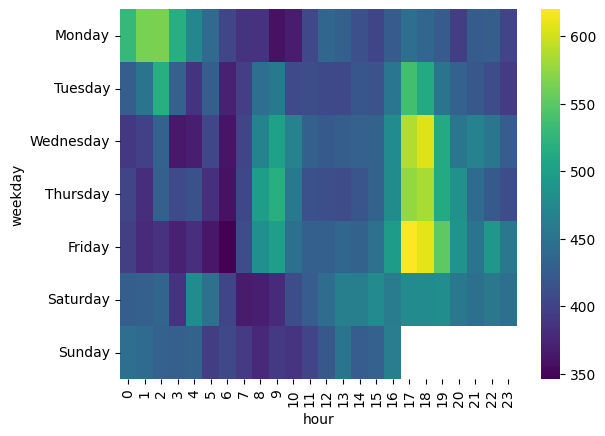

In [68]:
sns.heatmap(pivot_table, cmap='viridis')

<Axes: xlabel='trip_start_timestamp', ylabel='trip_seconds'>

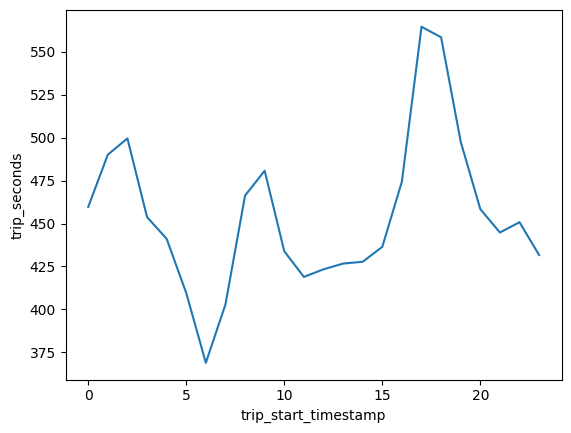

In [15]:
sns.lineplot(data=hourly,x="trip_start_timestamp",y="trip_seconds")

<Axes: xlabel='trip_start_timestamp', ylabel='trip_seconds'>

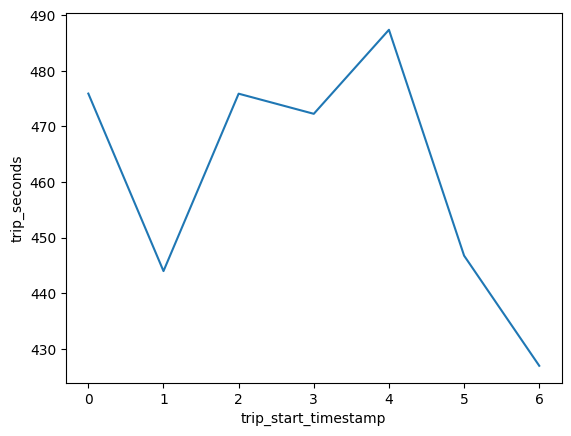

In [23]:
sns.lineplot(data=weekdaily,x="trip_start_timestamp",y="trip_seconds")